### 데이터: 서울시 구별 CCTV 대수+ 서울시 구별 인구수 (전체, 한국인, 외국인, 65세이상, 고령자)

## 목적: 데이터분석

In [1]:
#한글폰트 설치와 설정
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [2]:
#matplotlib 나눔바른고딕체로 폰트 변경
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')

In [3]:
#데이터파일 가져오기 위해 구글드라이브 마운트
from google.colab import drive

In [4]:
# CSV파일 가져오기
csvPath = '/content/drive/MyDrive/DataScience/data/01. CCTV_in_Seoul.csv'
xlsPath = '/content/drive/MyDrive/DataScience/data/01. population_in_Seoul.xls'
import pandas as pd
import numpy as np

cctv_seoul = pd.read_csv(csvPath, encoding='utf-8')

#info(),describe(),head(),tall()
cctv_seoul.describe()
cctv_seoul.head()
cctv_seoul.info

pop_seoul = pd.read_excel(xlsPath, header=2, usecols='B, D, G, J, N')
pop_seoul.head()

,자치구,계,계.1,계.2,65세이상고령자
0,합계,10197604.0,9926968.0,270636.0,1321458.0
1,종로구,162820.0,153589.0,9231.0,25425.0
2,중구,133240.0,124312.0,8928.0,20764.0
3,용산구,244203.0,229456.0,14747.0,36231.0
4,성동구,311244.0,303380.0,7864.0,39997.0


In [5]:
cctv_seoul.rename(columns={cctv_seoul.columns[0]: '구별'}, inplace=True)
cctv_seoul.head()

,구별,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,2780,1292,430,584,932
1,강동구,773,379,99,155,377
2,강북구,748,369,120,138,204
3,강서구,884,388,258,184,81
4,관악구,1496,846,260,390,613


In [6]:
cctv_seoul['최근증가율'] = (cctv_seoul['2016년'] + cctv_seoul['2015년'] + cctv_seoul['2014년']) /cctv_seoul['2013년도 이전'] * 100
cctv_seoul.head()

,구별,소계,2013년도 이전,2014년,2015년,2016년,최근증가율
0,강남구,2780,1292,430,584,932,150.619195
1,강동구,773,379,99,155,377,166.490765
2,강북구,748,369,120,138,204,125.203252
3,강서구,884,388,258,184,81,134.793814
4,관악구,1496,846,260,390,613,149.290780


In [7]:
#데이터에 질문
#가장 cctv가 많은?적은?곳
#소계를 기준으로 가장 많은?적은?5개씩 >>정렬(sort)
cctv_seoul_sort = cctv_seoul.sort_values(by='소계', ascending=False)
cctv_seoul_sort.head()

,구별,소계,2013년도 이전,2014년,2015년,2016년,최근증가율
0,강남구,2780,1292,430,584,932,150.619195
18,양천구,2034,1843,142,30,467,34.671731
14,서초구,1930,1406,157,336,398,63.371266
21,은평구,1873,1138,224,278,468,85.237258
20,용산구,1624,1368,218,112,398,53.216374


In [8]:
#질문: 최근 증가율 제일 높은 5구, 가장 적은 5구
cctv_seoul_sort = cctv_seoul.sort_values(by='최근증가율', ascending=False)
cctv_seoul_sort.head()

,구별,소계,2013년도 이전,2014년,2015년,2016년,최근증가율
22,종로구,1002,464,314,211,630,248.922414
9,도봉구,485,238,159,42,386,246.638655
12,마포구,574,314,118,169,379,212.101911
8,노원구,1265,542,57,451,516,188.929889
1,강동구,773,379,99,155,377,166.490765


In [9]:
#cctv_seoul에서 2013 이전, 2014년, 2015년, 2016년 컬럼 삭제
#cctv_seoul.drop(['2013년도 이전', '2014년', '2015년', '2016년'], axis=1, inplace=True)
#cctv_seoul.head()

In [10]:
#컬럼명 변경
pop_seoul.columns = ['구별', '인구수', '한국인', '외국인', '고령자']
pop_seoul.head()

,구별,인구수,한국인,외국인,고령자
0,합계,10197604.0,9926968.0,270636.0,1321458.0
1,종로구,162820.0,153589.0,9231.0,25425.0
2,중구,133240.0,124312.0,8928.0,20764.0
3,용산구,244203.0,229456.0,14747.0,36231.0
4,성동구,311244.0,303380.0,7864.0,39997.0


In [11]:
#불필요한 행 삭제: [0,26]

pop_seoul.drop([0,26], inplace=True)
pop_seoul.head()

,구별,인구수,한국인,외국인,고령자
1,종로구,162820.0,153589.0,9231.0,25425.0
2,중구,133240.0,124312.0,8928.0,20764.0
3,용산구,244203.0,229456.0,14747.0,36231.0
4,성동구,311244.0,303380.0,7864.0,39997.0
5,광진구,372164.0,357211.0,14953.0,42214.0


In [12]:
#인덱스 번호를 0~24로 변경
pop_seoul.reset_index(drop=True)#, inplace=True)
pop_seoul.head()

,구별,인구수,한국인,외국인,고령자
1,종로구,162820.0,153589.0,9231.0,25425.0
2,중구,133240.0,124312.0,8928.0,20764.0
3,용산구,244203.0,229456.0,14747.0,36231.0
4,성동구,311244.0,303380.0,7864.0,39997.0
5,광진구,372164.0,357211.0,14953.0,42214.0


In [13]:
#cctv_seoul, pop_seoul 데이터프레임 합치기
cctv_seoul_pop = pd.merge(cctv_seoul, pop_seoul, on='구별')
cctv_seoul_pop.head()

,구별,소계,2013년도 이전,2014년,2015년,2016년,최근증가율,인구수,한국인,외국인,고령자
0,강남구,2780,1292,430,584,932,150.619195,570500.0,565550.0,4950.0,63167.0
1,강동구,773,379,99,155,377,166.490765,453233.0,449019.0,4214.0,54622.0
2,강북구,748,369,120,138,204,125.203252,330192.0,326686.0,3506.0,54813.0
3,강서구,884,388,258,184,81,134.793814,603772.0,597248.0,6524.0,72548.0
4,관악구,1496,846,260,390,613,149.290780,525515.0,507203.0,18312.0,68082.0


In [14]:
#외국인 비율
cctv_seoul_pop['외국인비율'] = cctv_seoul_pop['외국인'] / cctv_seoul_pop['인구수'] * 100
cctv_seoul_pop

,구별,소계,2013년도 이전,2014년,2015년,2016년,최근증가율,인구수,한국인,외국인,고령자,외국인비율
0,강남구,2780,1292,430,584,932,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660
1,강동구,773,379,99,155,377,166.490765,453233.0,449019.0,4214.0,54622.0,0.929765
2,강북구,748,369,120,138,204,125.203252,330192.0,326686.0,3506.0,54813.0,1.061806
3,강서구,884,388,258,184,81,134.793814,603772.0,597248.0,6524.0,72548.0,1.080540
4,관악구,1496,846,260,390,613,149.290780,525515.0,507203.0,18312.0,68082.0,3.484582
5,광진구,707,573,78,53,174,53.228621,372164.0,357211.0,14953.0,42214.0,4.017852
6,구로구,1561,1142,173,246,323,64.973730,447874.0,416487.0,31387.0,56833.0,7.007998
7,금천구,1015,674,51,269,354,100.000000,255082.0,236353.0,18729.0,32970.0,7.342345
8,노원구,1265,542,57,451,516,188.929889,569384.0,565565.0,3819.0,71941.0,0.670725
9,도봉구,485,238,159,42,386,246.638655,348646.0,346629.0,2017.0,51312.0,0.578524


In [15]:
#65세이상 비율
cctv_seoul_pop['고령자비율'] = cctv_seoul_pop['고령자'] / cctv_seoul_pop['인구수'] * 100
cctv_seoul_pop

,구별,소계,2013년도 이전,2014년,2015년,2016년,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
0,강남구,2780,1292,430,584,932,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
1,강동구,773,379,99,155,377,166.490765,453233.0,449019.0,4214.0,54622.0,0.929765,12.051638
2,강북구,748,369,120,138,204,125.203252,330192.0,326686.0,3506.0,54813.0,1.061806,16.600342
3,강서구,884,388,258,184,81,134.793814,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794
4,관악구,1496,846,260,390,613,149.290780,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291
5,광진구,707,573,78,53,174,53.228621,372164.0,357211.0,14953.0,42214.0,4.017852,11.342849
6,구로구,1561,1142,173,246,323,64.973730,447874.0,416487.0,31387.0,56833.0,7.007998,12.689506
7,금천구,1015,674,51,269,354,100.000000,255082.0,236353.0,18729.0,32970.0,7.342345,12.925255
8,노원구,1265,542,57,451,516,188.929889,569384.0,565565.0,3819.0,71941.0,0.670725,12.634883
9,도봉구,485,238,159,42,386,246.638655,348646.0,346629.0,2017.0,51312.0,0.578524,14.717507


In [16]:
data_result = cctv_seoul_pop.drop(['2013년도 이전', '2014년', '2015년', '2016년'], axis=1)
data_result.head()
new_column_order = ['구별','인구','한국인','외국인','고령자','CCTV대수','CCTV증가율','고령자비율','외국인비율']
data_result.head()

,구별,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
0,강남구,2780,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
1,강동구,773,166.490765,453233.0,449019.0,4214.0,54622.0,0.929765,12.051638
2,강북구,748,125.203252,330192.0,326686.0,3506.0,54813.0,1.061806,16.600342
3,강서구,884,134.793814,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794
4,관악구,1496,149.290780,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291


In [17]:
#matplotlib으로 그래프 그리기 위해서 인덱스를 '구별'로 변경
data_result.set_index('구별', inplace=True)
data_result.head()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
구별,,,,,,,,
강남구,2780,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
강동구,773,166.490765,453233.0,449019.0,4214.0,54622.0,0.929765,12.051638
강북구,748,125.203252,330192.0,326686.0,3506.0,54813.0,1.061806,16.600342
강서구,884,134.793814,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794
관악구,1496,149.290780,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291


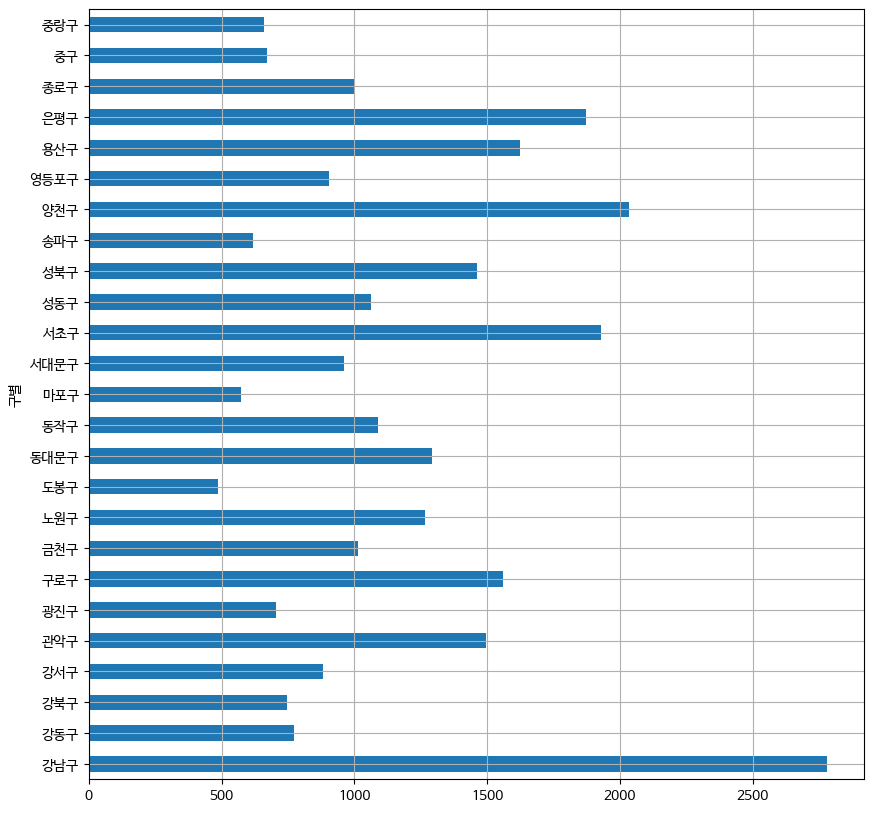

In [18]:
import matplotlib.pyplot as plt

plt.figure()
data_result['소계'].plot(kind='barh', grid=True, figsize=(10,10))
plt.show()

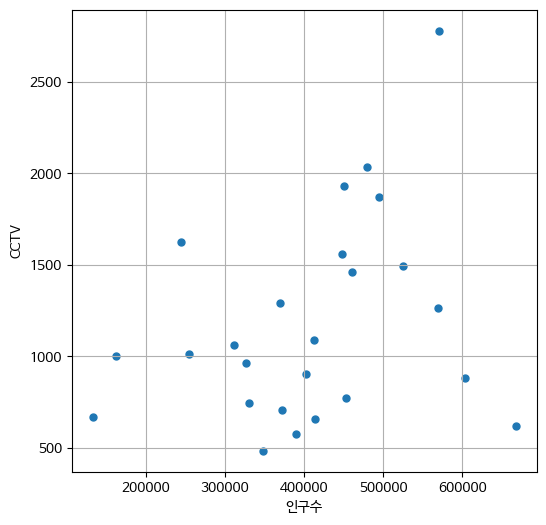

In [19]:
#matplotlib으로 가로축은 '인구', 세로축은 'CCTV대수'인 scatter 그래프를 출력
plt.figure(figsize=(6,6))
# 산점도(x,y)
plt.scatter(data_result['인구수'], data_result['소계'], s=25)
plt.xlabel('인구수')
plt.ylabel('CCTV')
plt.grid()
plt.show()

In [20]:
print(data_result.columns)

Index(['소계', '최근증가율', '인구수', '한국인', '외국인', '고령자', '외국인비율', '고령자비율'], dtype='object')


In [21]:
 data_result.columns = ['CCTV대수', '최근증가율', '인구수', '한국인', '외국인', '고령자', '외국인비율', '고령자비율']

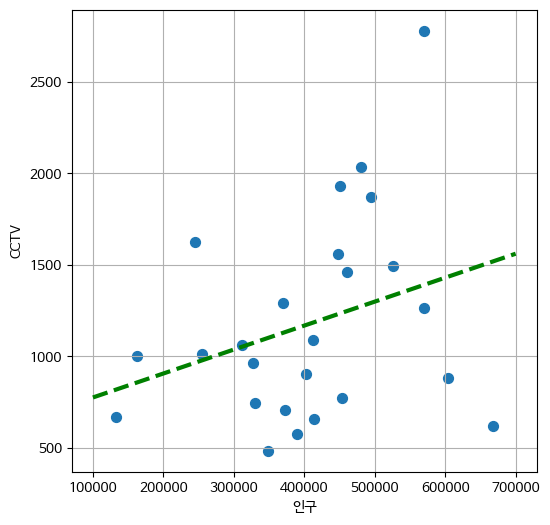

In [22]:
fp1 = np.polyfit(data_result['인구수'], data_result['CCTV대수'], 1)
f1 = np.poly1d(fp1)
fx = np.linspace(100000, 700000, 100)

plt.figure(figsize=(6,6))
plt.scatter(data_result['인구수'], data_result['CCTV대수'], s=50)
plt.plot(fx, f1(fx), ls='dashed', lw=3, color='g')
plt.xlabel('인구')
plt.ylabel('CCTV')
plt.grid()
plt.show()

In [25]:
data_result['오차'] = np.abs(data_result['CCTV대수'] - f1(data_result['인구수']))
df_sort = data_result.sort_values(by='오차', ascending=False)
df_sort.head()

,CCTV대수,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율,오차
구별,,,,,,,,,
강남구,2780,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217,1388.055355
송파구,618,104.347826,667483.0,660584.0,6899.0,72506.0,1.033584,10.862599,900.911312
양천구,2034,34.671731,479978.0,475949.0,4029.0,52975.0,0.839413,11.036964,760.563512
서초구,1930,63.371266,450310.0,445994.0,4316.0,51733.0,0.958451,11.488308,695.403794
용산구,1624,53.216374,244203.0,229456.0,14747.0,36231.0,6.038828,14.836427,659.231690


<ipython-input-26-0c442897befe>:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(df_sort['인구수'][n]*1.02, df_sort['CCTV대수'][n]*0.981,


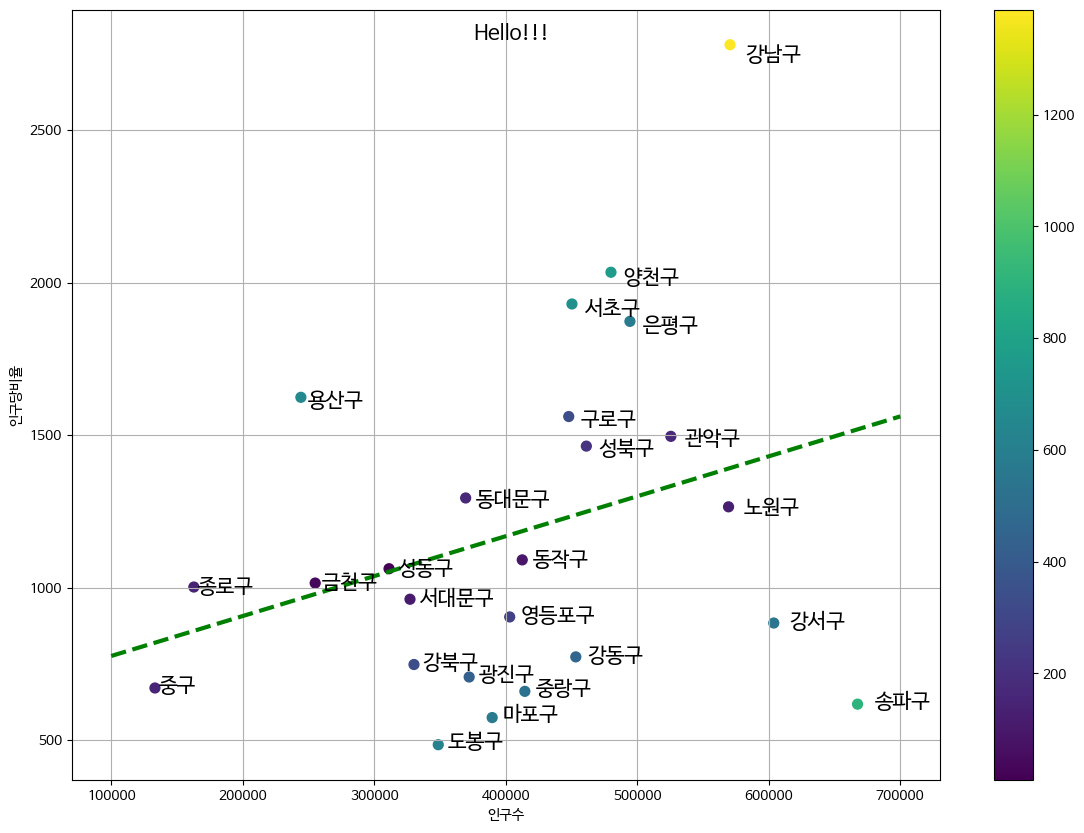

In [26]:
plt.figure(figsize=(14,10))
plt.scatter(data_result['인구수'], data_result['CCTV대수'],
            c=data_result['오차'], s=50)
plt.plot(fx, f1(fx), ls='dashed', lw=3, color='g')

for n in range(25):
    # text를 출력할 x좌표의 시작점, y좌표의 시작점, 찍을 내용
    plt.text(df_sort['인구수'][n]*1.02, df_sort['CCTV대수'][n]*0.981,
             df_sort.index[n], fontsize=15)

temp = "Hello!!!"
plt.text(400000-25000, 2800, temp, fontsize=15)

plt.xlabel('인구수')
plt.ylabel('인구당비율')
plt.colorbar()
plt.grid()
plt.show()